In [1]:
import cv2
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15,10]

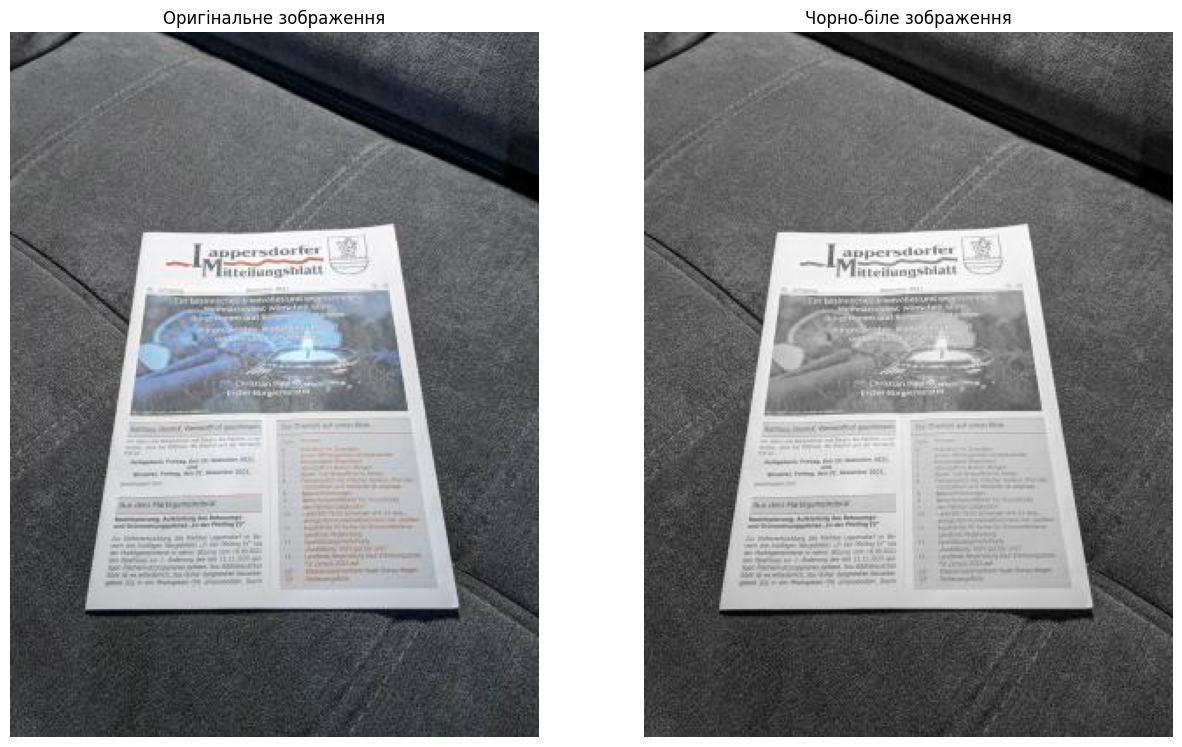

In [2]:
img = cv2.imread('../lab6_Verenchuk_Stanislav/data/document.jpg')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Перетворення у чорно-біле
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray) / 255
rows, cols = gray.shape

# Візуалізація
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Оригінальне зображення')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap="gray")
plt.title('Чорно-біле зображення')
plt.axis('off')

plt.show()

In [3]:
# Harris corner detection
cornerness = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
cornerness[cornerness < 0] = 0    # відкидаємо від'ємні значення
cornerness_log = np.log(cornerness + 1e-6)    # логарифмічна шкала

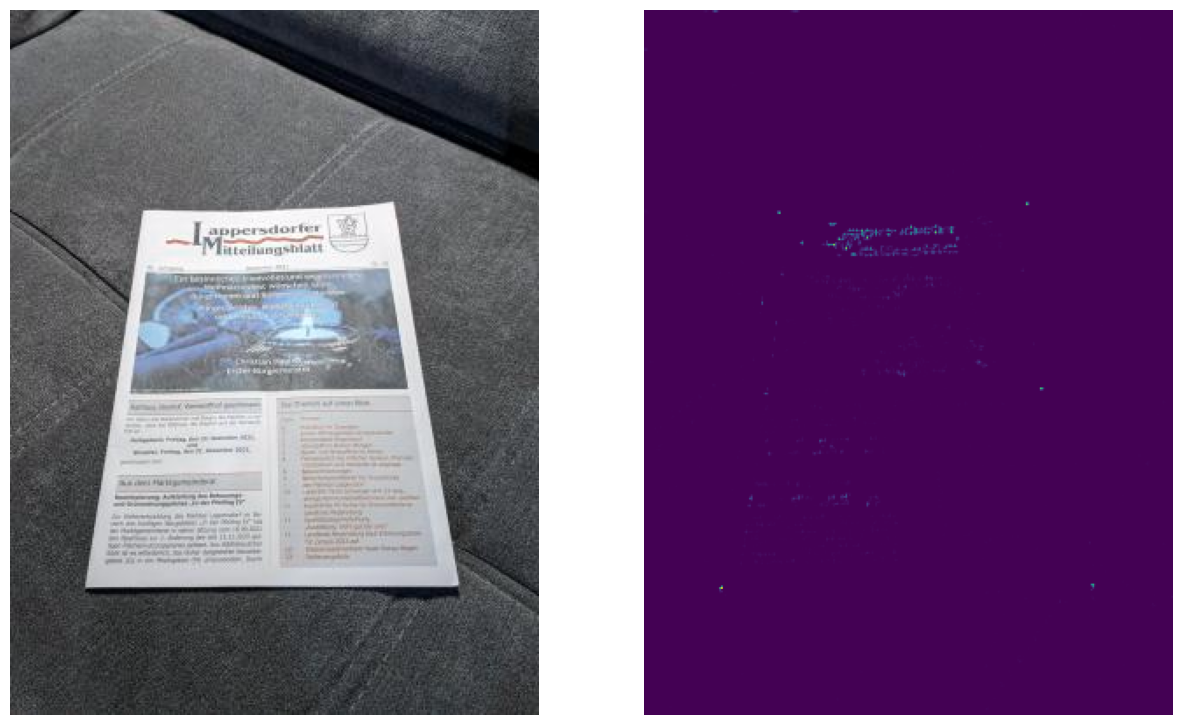

In [4]:
# Візуалізація
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cornerness)
plt.axis('off')

plt.show()

In [5]:
# Параметри
#quad_size = 5
#block_size = 2 * quad_size
#th_top_left = th_top_right = th_bottom_left = th_bottom_right = -np.inf

# Координати для 4 кутів
#opt_top_left = opt_top_right = opt_bottom_left = opt_bottom_right = (0, 0)

In [5]:
th_top_left = th_top_right = -1e6
th_bottom_left = th_bottom_right = -1e6

# Координати для 4 кутів
opt_top_left = opt_top_right = None
opt_bottom_left = opt_bottom_right = None

quad_size = 7

In [6]:
for r in range(quad_size, rows-quad_size):
    for c in range(quad_size, cols-quad_size):
        if cornerness[r, c] < -7:
            continue

        block = 255 * gray[r - quad_size:r + quad_size, c - quad_size:c + quad_size]

        qtl = block[0:quad_size, 0:quad_size]
        qtr = block[0:quad_size, quad_size:2*quad_size]
        qbl = block[quad_size:2*quad_size, 0:quad_size]
        qbr = block[quad_size:2*quad_size, quad_size:2*quad_size]

        # Дескриптор верхнього лівого кута
        desc_tl = np.mean(qbr) - np.mean(qtl) - np.mean(qtr) - np.mean(qbl)
        if desc_tl > th_top_left:
            th_top_left = desc_tl
            opt_top_left = (c, r)

        # Дескриптор верхнього правого кута
        desc_tr = np.mean(qbl) - np.mean(qtl) - np.mean(qtr) - np.mean(qbr)
        if desc_tr > th_top_right:
            th_top_right = desc_tr
            opt_top_right = (c, r)

        # Дескриптор нижнього лівого кута
        desc_bl = np.mean(qtr) - np.mean(qtl) - np.mean(qbl) - np.mean(qbr)
        if desc_bl > th_bottom_left:
            th_bottom_left = desc_bl
            opt_bottom_left = (c, r)

        # Дескриптор верхнього правого кута
        desc_br = np.mean(qtl) - np.mean(qtr) - np.mean(qbl) - np.mean(qbr)
        if desc_br > th_bottom_right:
            th_bottom_right = desc_br
            opt_bottom_right = (c, r)

In [23]:
# Нанесення кіл у знайдені кути
#output = img.copy()
#for pt in [opt_top_left, opt_top_right, opt_bottom_left, opt_bottom_right]:
#    output = cv2.circle(output, pt, radius=5, color=(255, 0, 0), thickness=-1)

In [7]:
out = img.copy()
out = cv2.circle(out, opt_top_left, 3, (255, 0, 0 ), -1)
out = cv2.circle(out, opt_top_right, 3, (255, 0, 0 ), -1)
out = cv2.circle(out, opt_bottom_left, 3, (255, 0, 0 ), -1)
out = cv2.circle(out, opt_bottom_right, 3, (255, 0, 0 ), -1)

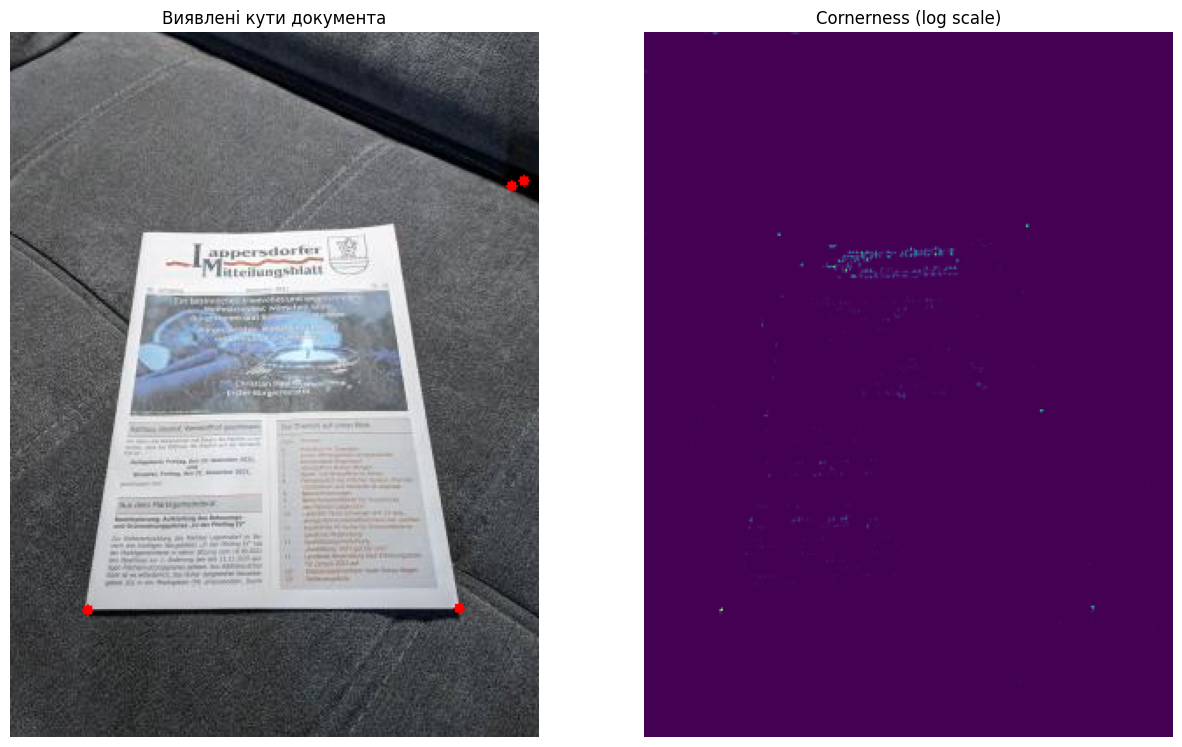

In [8]:
# Візуалізація
plt.subplot(1, 2, 1)
plt.imshow(out)
plt.title('Виявлені кути документа')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cornerness)
plt.title('Cornerness (log scale)')
plt.axis('off')
plt.show()

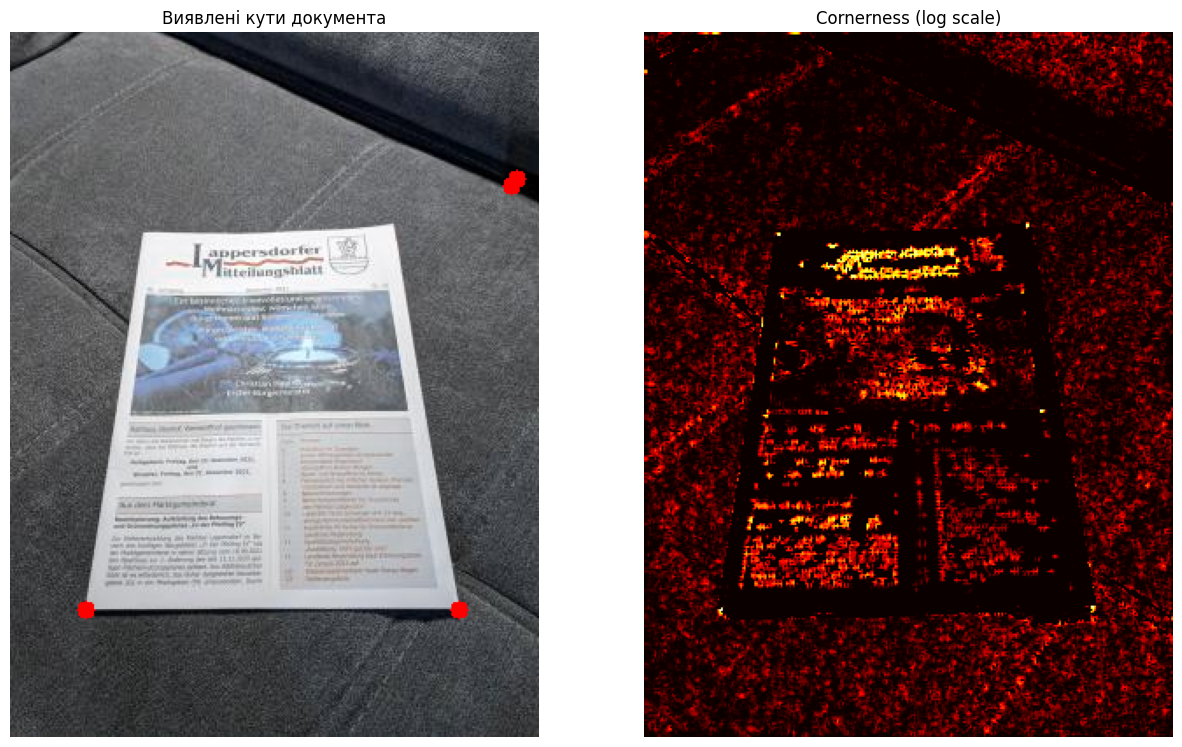

In [26]:
for r in range(quad_size, rows - quad_size):
    for c in range(quad_size, cols - quad_size):
        if cornerness[r, c] == 0:
            continue

        block = gray[r - quad_size:r + quad_size, c - quad_size:c + quad_size]
        if block.shape != (block_size, block_size):
            continue

        qtl = block[:quad_size, :quad_size]
        qtr = block[:quad_size, quad_size:]
        qbl = block[quad_size:, :quad_size]
        qbr = block[quad_size:, quad_size:]

        # Дескриптор верхнього лівого кута
        desc_tl = np.mean(qbr) - (np.mean(qtl) + np.mean(qtr) + np.mean(qbl))
        if desc_tl > th_top_left:
            th_top_left = desc_tl
            opt_top_left = (c, r)

        # Дескриптор верхнього правого кута
        desc_tr = np.mean(qbl) - (np.mean(qtl) + np.mean(qtr) + np.mean(qbr))
        if desc_tr > th_top_right:
            th_top_right = desc_tr
            opt_top_right = (c, r)

        # Дескриптор нижнього лівого кута
        desc_bl = np.mean(qtr) - (np.mean(qtl) + np.mean(qbl) + np.mean(qbr))
        if desc_bl > th_bottom_left:
            th_bottom_left = desc_bl
            opt_bottom_left = (c, r)

        # Дескриптор верхнього правого кута
        desc_br = np.mean(qtl) - (np.mean(qtr) + np.mean(qbl) + np.mean(qbr))
        if desc_br > th_bottom_right:
            th_bottom_right = desc_br
            opt_bottom_right = (c, r)

# Нанесення кіл у знайдені кути
output = img.copy()
for pt in [opt_top_left, opt_top_right, opt_bottom_left, opt_bottom_right]:
    output = cv2.circle(output, pt, radius=5, color=(255, 0, 0), thickness=-1)

# Візуалізація
plt.subplot(1, 2, 1)
plt.imshow(output)
plt.title('Виявлені кути документа')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cornerness_log, cmap='hot')
plt.title('Cornerness (log scale)')
plt.axis('off')
plt.show()